In [61]:
# Cannot use Cuda Toolkit to run my model on my GPU since my GPU isn't a CUDA-Capaable GPU
# To check if GPU is CUDA-Capable, visit :
# https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html#:~:text=2.1.,-Verify%20You%20Have&text=You%20can%20verify%20that%20you,that%20GPU%20is%20CUDA%2Dcapable.
# If GPU is CUDA compatible then use this youtube video as an installation guide:
# https://www.youtube.com/watch?v=hHWkvEcDBO0&ab_channel=AladdinPersson

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
# we will use Inception V3 for our application 
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

In [50]:
# Data pre-processing and initiazling paths and variables
train_path = 'Datasets/train'
val_path = 'Datasets/val'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(train_path,
    target_size = (299, 299),
    batch_size = 32,
    class_mode = 'categorical'
)

for i in os.listdir("Datasets/train/"):
    print(str(len(os.listdir("Datasets/train/" +i))) +" "+ i +" images")

val_set = val_datagen.flow_from_directory(val_path,
    target_size = (299, 299),
    batch_size = 32, 
    class_mode = 'categorical'                                             
)

for i in os.listdir("Datasets/val/"):
    print(str(len(os.listdir("Datasets/val/" +i))) +" "+ i +" images")

Found 1951 images belonging to 4 classes.
288 diseased cotton leaf images
815 diseased cotton plant images
427 fresh cotton leaf images
421 fresh cotton plant images
Found 253 images belonging to 4 classes.
43 diseased cotton leaf images
78 diseased cotton plant images
66 fresh cotton leaf images
66 fresh cotton plant images


In [51]:
# Model - Inception V3
inception = InceptionV3(weights='imagenet', include_top=False, 
                        input_tensor=Input(shape=(299, 299, 3)))
#include_top = false means that we are removing the top layer because we want to set out own image size

# don't train all the layers - we want to use the existing weights in Inception Model except top and last layer
for layer in inception.layers:
    layer.trainable = False

flatten = tf.keras.layers.Flatten()(inception.output)
output = tf.keras.layers.Dense(4, activation='softmax')(flatten)

# creating a model object
model = Model(inputs=inception.input, outputs=output)

In [52]:
# Defining optimizer, loss function, metrics and 
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_564 (Conv2D)             (None, 149, 149, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_564 (BatchN (None, 149, 149, 32) 96          conv2d_564[0][0]                 
__________________________________________________________________________________________________
activation_564 (Activation)     (None, 149, 149, 32) 0           batch_normalization_564[0][0]    
____________________________________________________________________________________________

In [53]:
epochs = 20

history = model.fit(train, validation_data=valid, epochs=20)

  ...
    to  
  ['...']
Train for 49 steps
Epoch 1/20
49/49 [==============================] - 199s 4s/step - loss: 3.8784 - accuracy: 0.6889
Epoch 2/20
49/49 [==============================] - 172s 4s/step - loss: 0.8635 - accuracy: 0.8963
Epoch 3/20
49/49 [==============================] - 168s 3s/step - loss: 0.4812 - accuracy: 0.9366
Epoch 4/20
49/49 [==============================] - 169s 3s/step - loss: 0.9071 - accuracy: 0.9001
Epoch 5/20
49/49 [==============================] - 167s 3s/step - loss: 0.7560 - accuracy: 0.9174
Epoch 6/20
49/49 [==============================] - 167s 3s/step - loss: 0.4582 - accuracy: 0.9558
Epoch 7/20
49/49 [==============================] - 171s 3s/step - loss: 0.2764 - accuracy: 0.9686
Epoch 8/20
49/49 [==============================] - 167s 3s/step - loss: 0.3627 - accuracy: 0.9622
Epoch 9/20
49/49 [==============================] - 166s 3s/step - loss: 0.4335 - accuracy: 0.9558
Epoch 10/20
49/49 [==============================] - 167s 3s/step

In [56]:
#saving model
tf.keras.models.save_model(model,'model_InceptionV5.hdf5')

KeyError: 'val_loss'

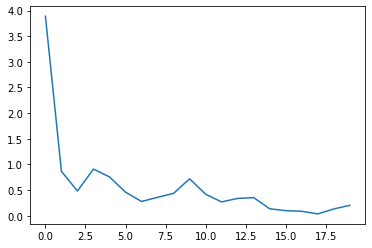

In [57]:
#Plotting loss
plt.plot(history.epoch, history.history['loss'], label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation Loss')
plt.legend()

KeyError: 'val_accuracy'

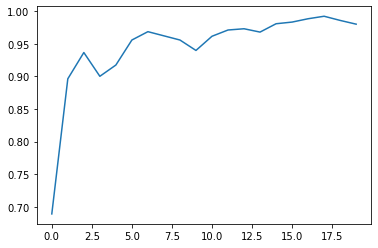

In [59]:
# Plotting Accuracy

x_axis = range(epochs)

plt.plot(history.epoch, history.history['accuracy'], label='Training Accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

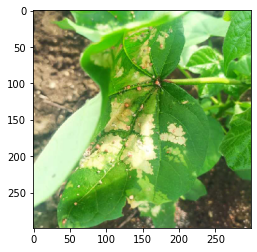

In [73]:
#Testing Sample images from "test" dataset

img_path = "./Datasets/test/diseased cotton leaf/dis_leaf (183)_iaip.jpg"
img = image.load_img(img_path, target_size=(299, 299))

plt.imshow(img)
plt.show()

In [78]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

prediction = model.predict(img_preprocessed)
print(prediction)

[[9.0028651e-33 1.0000000e+00 0.0000000e+00 1.0097902e-23]]
